In [6]:
import pyproj
import pandas as pd
data = pd.read_csv('../ICESAT/tasmania/tasmania_g.csv', delimiter=' ')

def transform_datafr(from_epsg, to_epsg, df):
    src_crs = pyproj.CRS.from_epsg(from_epsg)  # WGS84
    target_crs = pyproj.CRS.from_epsg(to_epsg)  # Web Mercator
    # Create a transformer
    transformer = pyproj.Transformer.from_crs(src_crs, target_crs, always_xy=True)
    df['x'], df['y'] = transformer.transform(df['x'].values, df['y'].values)
    return df

dataT = transform_datafr(5551, 4326, data)

dataT.columns = ['lon', 'lat', 'h_te_interp']
dataT = dataT[['lat', 'lon', 'h_te_interp']]

# dataT.to_csv('../ICESAT/tasmania/tasman_samples4.csv', index=False)


KeyError: 'x'

Min: -104.58004
Max: 1244.2256
Std: 241.05431210370278
Min: -5.233771
Max: 1249.0
Std: 242.34509544166292


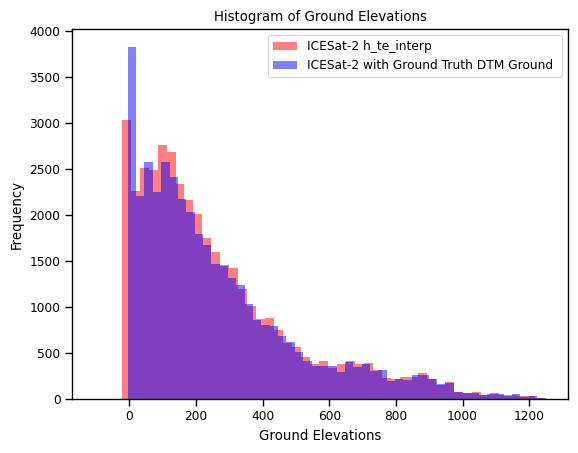

In [26]:
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns
sns.set_context("paper")

data_tasi = pd.read_csv('../ICESAT/tasmania/tasmania_i.csv', delimiter=',')
data_tas = pd.read_csv('../ICESAT/tasmania/tasmania_g.csv', delimiter=',')

data_tasi = data_tasi["h_te_interp"]
# .reset_index(drop=True)

# print("Freq:", data_tas.size, tasmania.size)
print("Min:", data_tasi.min())
print("Max:", data_tasi.max())
print("Std:", data_tasi.std())

print("Min:", data_tas['g_height'].min())
print("Max:", data_tas['g_height'].max())
print("Std:", data_tas['g_height'].std())

data1 = data_tasi

data2 = data_tas['g_height']

plt.hist(data1, bins=50, alpha=0.5, label='ICESat-2 h_te_interp', color='red')
plt.hist(data2, bins=50, alpha=0.5, label='ICESat-2 with Ground Truth DTM Ground ', color='blue')
plt.xlabel('Ground Elevations')
plt.ylabel('Frequency')
plt.title('Histogram of Ground Elevations')
plt.legend()
plt.show()


